# Modeling

In [18]:
#import necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


pd.options.mode.chained_assignment = None  # default='warn'

from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.metrics import confusion_matrix, classification_report
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# sns.set_style('whitegrid')

from sklearn.metrics import plot_confusion_matrix

from xgboost import XGBClassifier

## Read CSV file

In [19]:
df1 = pd.read_csv('bridge_data_cleaned1')
df1.head()

,state,str_id,deck_type,wearing_type,membrane_type,deck_protection,toll,freeze_thaw_cycle,snowfall_days,inventory_class_route,...,yr_reconst,skew,max_span,bridge_width,deck_width,super_st_condition,sub_st_condition,deck_condition,avg_daily_trfic,avg_truck_trfc
0,Alabama,021480,1,0,0,0,3.0,14,0.0,2.0,...,0,23.0,274.9,38.1,41.0,7.0,7.0,7.0,4940,35
1,Alabama,009763,N,6,0,0,3.0,14,0.0,7.0,...,0,45.0,12.1,0.0,0.0,NaN,NaN,NaN,280,7
2,Alabama,003324,N,N,N,N,3.0,14,0.0,6.0,...,2009,0.0,7.9,0.0,0.0,NaN,NaN,NaN,420,7
3,Alabama,006369,1,0,0,0,3.0,14,0.0,6.0,...,0,0.0,60.0,23.6,27.6,7.0,7.0,6.0,420,7
4,Alabama,015078,2,0,0,0,3.0,14,0.0,8.0,...,0,0.0,15.1,23.6,24.9,5.0,6.0,5.0,70,0


In [20]:
df2 = pd.read_csv('bridge_data_cleaned2')
df2.head()

,state,str_id,deck_type,wearing_type,membrane_type,deck_protection,toll,freeze_thaw_cycle,snowfall_days,inventory_class_route,...,yr_reconst,skew,max_span,bridge_width,deck_width,super_st_condition,sub_st_condition,deck_condition,avg_daily_trfic,avg_truck_trfc
0,Minnesota,L9347,8,8,0,N,3,114,83.0,9,...,0,0.0,32.2,24.0,25.9,5.0,5.0,7.0,40,15
1,Minnesota,L9903,N,N,N,N,3,112,83.0,9,...,0,0.0,11.5,0.0,0.0,NaN,NaN,NaN,28,4
2,Minnesota,96781,N,N,N,N,3,96,111.0,7,...,0,30.0,11.8,0.0,0.0,NaN,NaN,NaN,450,4
3,Minnesota,34J05,N,N,N,N,3,111,89.0,9,...,0,4.0,12.1,0.0,0.0,NaN,NaN,NaN,48,10
4,Minnesota,17508,8,6,0,N,3,112,83.0,9,...,0,0.0,44.9,20.3,21.7,8.0,7.0,7.0,20,3


In [21]:
df3 = pd.read_csv('bridge_data_cleaned3')
df3.head()

,state,str_id,deck_type,wearing_type,membrane_type,deck_protection,toll,freeze_thaw_cycle,snowfall_days,inventory_class_route,...,yr_reconst,skew,max_span,bridge_width,deck_width,super_st_condition,sub_st_condition,deck_condition,avg_daily_trfic,avg_truck_trfc
0,Pennsylvania,000000000018583,1,6,2,0,3,117,59.0,2,...,0,1.0,21.0,49.2,52.5,6.0,6.0,6.0,12394,10
1,Pennsylvania,000000000041175,1,1,0,1,3,117,70.0,1,...,0,35.0,240.2,52.2,55.1,8.0,7.0,7.0,12189,15
2,Pennsylvania,000000000041176,1,1,0,1,3,117,70.0,1,...,0,34.0,226.0,51.8,54.8,8.0,7.0,7.0,12744,14
3,Pennsylvania,000000000004028,1,3,0,1,3,104,48.0,1,...,2004,0.0,32.2,40.0,43.6,8.0,6.0,6.0,8169,34
4,Pennsylvania,000000000009312,N,N,N,N,3,117,70.0,1,...,0,56.0,37.1,0.0,0.0,NaN,NaN,NaN,11792,39


In [22]:
df = pd.concat([df1, df2, df3])
df.head()

,state,str_id,deck_type,wearing_type,membrane_type,deck_protection,toll,freeze_thaw_cycle,snowfall_days,inventory_class_route,...,yr_reconst,skew,max_span,bridge_width,deck_width,super_st_condition,sub_st_condition,deck_condition,avg_daily_trfic,avg_truck_trfc
0,Alabama,021480,1,0,0,0,3.0,14,0.0,2.0,...,0,23.0,274.9,38.1,41.0,7.0,7.0,7.0,4940,35
1,Alabama,009763,N,6,0,0,3.0,14,0.0,7.0,...,0,45.0,12.1,0.0,0.0,NaN,NaN,NaN,280,7
2,Alabama,003324,N,N,N,N,3.0,14,0.0,6.0,...,2009,0.0,7.9,0.0,0.0,NaN,NaN,NaN,420,7
3,Alabama,006369,1,0,0,0,3.0,14,0.0,6.0,...,0,0.0,60.0,23.6,27.6,7.0,7.0,6.0,420,7
4,Alabama,015078,2,0,0,0,3.0,14,0.0,8.0,...,0,0.0,15.1,23.6,24.9,5.0,6.0,5.0,70,0


In [23]:
df.shape

(592756, 38)

In [25]:
df.loc[df['state']=='  Iowa']

,state,str_id,deck_type,wearing_type,membrane_type,deck_protection,toll,freeze_thaw_cycle,snowfall_days,inventory_class_route,...,yr_reconst,skew,max_span,bridge_width,deck_width,super_st_condition,sub_st_condition,deck_condition,avg_daily_trfic,avg_truck_trfc
93045,Iowa,000000000171401,N,N,N,N,3.0,116,74.0,7.0,...,0,45.0,9.8,0.0,0.0,NaN,NaN,NaN,230,19
93046,Iowa,000000000171920,8,7,0,0,3.0,116,74.0,8.0,...,2008,0.0,160.1,14.4,16.1,0.0,0.0,0.0,60,0
93047,Iowa,000000000021055,1,4,0,0,3.0,118,73.0,14.0,...,0,0.0,500.0,24.9,33.1,6.0,6.0,6.0,10500,2
93048,Iowa,000000000020860,1,0,0,1,3.0,118,73.0,14.0,...,1999,0.0,644.0,29.2,32.8,5.0,5.0,6.0,11800,12
93049,Iowa,000000000502671,N,N,N,N,3.0,118,73.0,19.0,...,0,15.0,9.8,0.0,0.0,NaN,NaN,NaN,1060,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116789,Iowa,000000000700340,1,1,0,1,3.0,119,64.0,11.0,...,0,31.0,85.0,62.7,65.6,9.0,9.0,9.0,13450,18
116790,Iowa,000000000034671,1,1,0,1,3.0,115,75.0,7.0,...,0,0.0,30.8,30.5,33.1,9.0,9.0,9.0,700,0
116791,Iowa,000000000230571,1,1,0,0,3.0,115,75.0,9.0,...,0,15.0,30.8,30.5,33.1,9.0,9.0,9.0,25,0
116792,Iowa,000000000003060,1,6,0,0,3.0,117,67.0,19.0,...,1984,24.0,28.9,24.3,34.4,0.0,0.0,0.0,3160,0


In [26]:
df.loc[df['state']=='Iowa'].bridge_condition.value_counts()

Series([], Name: bridge_condition, dtype: int64)

In [27]:
df['state'] = df['state'].replace(' Iowa', 'Iowa', regex=True)
df['state'] = df['state'].replace('  Iowa', 'Iowa')
# df['state'] = df.loc[(df['state']=='  Iowa').str.strip()]
# df[df['state']=='  Iowa']

In [28]:
df.loc[df['state']=='Iowa']

,state,str_id,deck_type,wearing_type,membrane_type,deck_protection,toll,freeze_thaw_cycle,snowfall_days,inventory_class_route,...,yr_reconst,skew,max_span,bridge_width,deck_width,super_st_condition,sub_st_condition,deck_condition,avg_daily_trfic,avg_truck_trfc
106432,Iowa,000000000361340,1,1,0,0,3.0,118,65.0,8.0,...,0,0.0,48.9,29.9,33.1,6.0,5.0,6.0,40,0


In [29]:
df.shape

(592756, 38)

In [30]:
# sns.set_style('darkgrid')

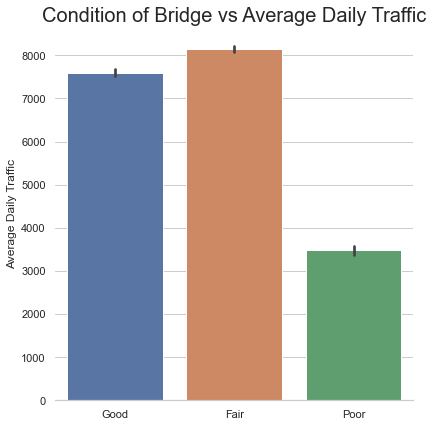

In [34]:
import seaborn as sns
sns.set_theme(style="whitegrid")

# Draw a nested barplot by bridge_condition and avg_daily_trfic
g = sns.catplot(
    data=df, kind="bar",
    x="bridge_condition", y="avg_daily_trfic",
     height=6
)
g.despine(left=True)
g.set_axis_labels("", "Average Daily Traffic")
plt.title("Condition of Bridge vs Average Daily Traffic", fontsize=20);

Text(0.5, 0, 'Bridge Condition')

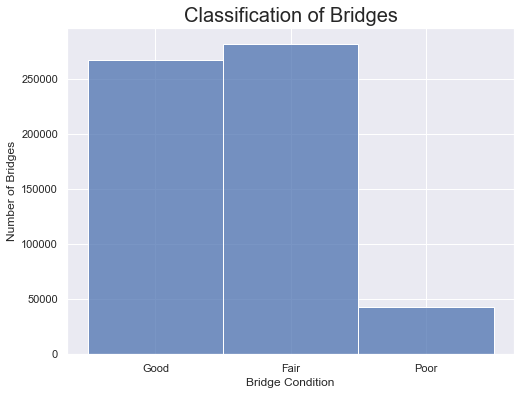

In [35]:
#plot number of bridges according to condition
sns.set_theme(style="darkgrid")
plt.figure(figsize=(8,6))
sns.histplot(df['bridge_condition'], bins='auto');
plt.title('Classification of Bridges', fontsize=20)
plt.ylabel('Number of Bridges')
plt.xlabel('Bridge Condition')

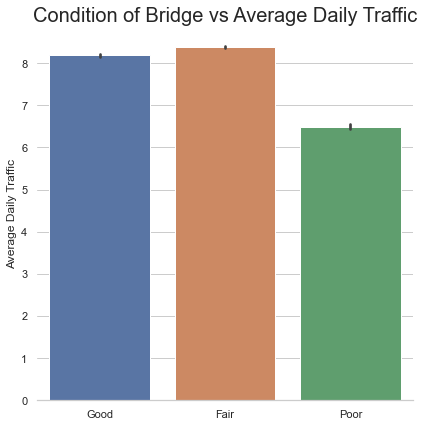

In [36]:
import seaborn as sns
sns.set_theme(style="whitegrid")

# Draw a nested barplot by bridge_condition and avg_daily_trfic
g = sns.catplot(
    data=df, kind="bar",
    x="bridge_condition", y='avg_truck_trfc',
     height=6
)
g.despine(left=True)
g.set_axis_labels("", "Average Daily Truck Traffic")
plt.title("Average Daily Truck Traffic per Condition", fontsize=20);

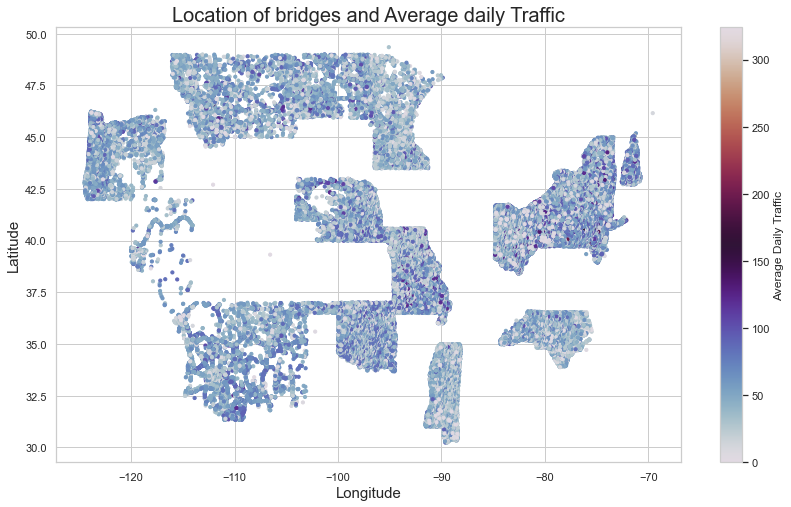

In [37]:
# plot wells on map with respect to water point height
plt.figure(figsize=(14,8))

plt.scatter(x='longitude', y='latitude', c='bridge_age' , data=df2, s=10, cmap='twilight')
plt.colorbar().set_label('Average Daily Traffic')
plt.xlabel('Longitude', fontsize=15)
plt.ylabel('Latitude', fontsize=15)
plt.title('Location of bridges and Average daily Traffic', fontsize=20)

plt.show()


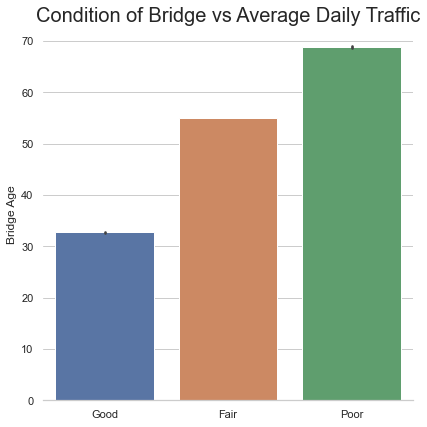

In [38]:
import seaborn as sns
sns.set_theme(style="whitegrid")

# Draw a nested barplot by bridge_condition and avg_daily_trfic
g = sns.catplot(
    data=df, kind="bar",
    x="bridge_condition", y='bridge_age',
     height=6
)
g.despine(left=True)
g.set_axis_labels('','Bridge Age')
plt.title("Condition of Bridge vs Age", fontsize=20);

In [39]:
df.bridge_age.value_counts()

61     12253
56     11774
51     11518
53      9369
58      8934
       ...  
220        1
214        1
212        1
162        1
324        1
Name: bridge_age, Length: 215, dtype: int64

In [40]:
dff = df[['state', 'bridge_condition']]
dff.head()

,state,bridge_condition
0,Alabama,Good
1,Alabama,Fair
2,Alabama,Good
3,Alabama,Fair
4,Alabama,Fair


In [41]:
dfx = dff.groupby('state')['bridge_condition'].value_counts(normalize=True).reset_index(name='perc_count')
dfx.head()

,state,bridge_condition,perc_count
0,Alabama,Fair,0.550587
1,Alabama,Good,0.410988
2,Alabama,Poor,0.038425
3,Alaska,Fair,0.482892
4,Alaska,Good,0.434474


In [42]:
poor_df = dfx.loc[dfx['bridge_condition']=='Poor'].sort_values(by='perc_count', ascending=False)[:20]
poor_df

,state,bridge_condition,perc_count
143,West Virginia,Poor,0.212489
152,Iowa,Poor,0.190879
116,Rhode Island,Poor,0.182944
122,South Dakota,Poor,0.177805
113,Pennsylvania,Poor,0.143127
56,Maine,Poor,0.130526
53,Louisiana,Poor,0.123979
65,Michigan,Poor,0.109354
101,North Dakota,Poor,0.103464
107,Oklahoma,Poor,0.100594


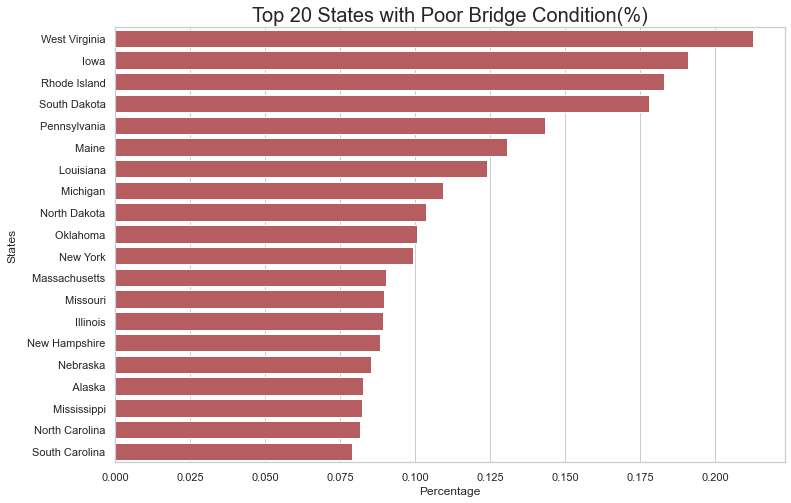

In [43]:
plt.figure(figsize=(12,8))
sns.barplot(y=poor_df['state'], x=poor_df['perc_count'], color='r')
plt.xlabel('Percentage')
plt.ylabel('States')
plt.title('Top 20 States with Poor Bridge Condition(%)', fontsize=20);

In [44]:
fair_df = dfx.loc[dfx['bridge_condition']=='Fair'].sort_values(by='perc_count', ascending=False)[:20]
fair_df

,state,bridge_condition,perc_count
155,Iowa,Fair,1.000000
33,Hawaii,Fair,0.735079
24,District of Columbia,Fair,0.716129
60,Massachusetts,Fair,0.657093
87,New Jersey,Fair,0.656988
18,Connecticut,Fair,0.654053
21,Delaware,Fair,0.651807
36,Idaho,Fair,0.648389
147,Wyoming,Fair,0.647251
114,Rhode Island,Fair,0.634113


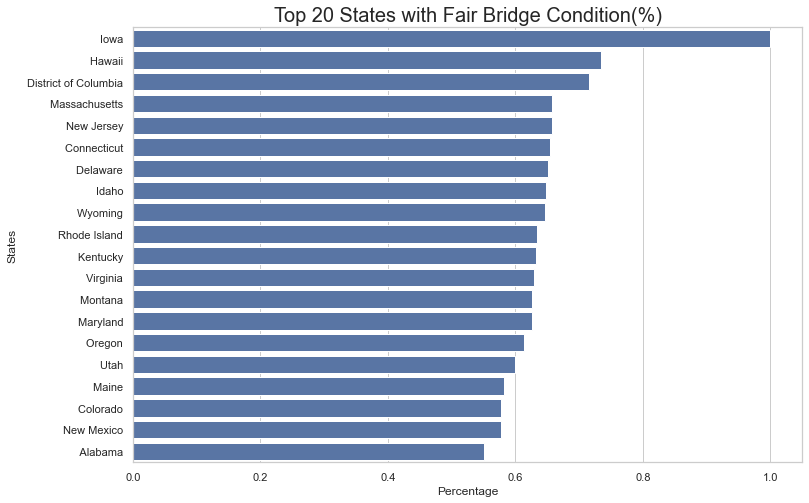

In [45]:
plt.figure(figsize=(12,8))
sns.barplot(y=fair_df['state'], x=fair_df['perc_count'], color='b')
plt.xlabel('Percentage')
plt.ylabel('States')
plt.title('Top 20 States with Fair Bridge Condition(%)', fontsize=20);

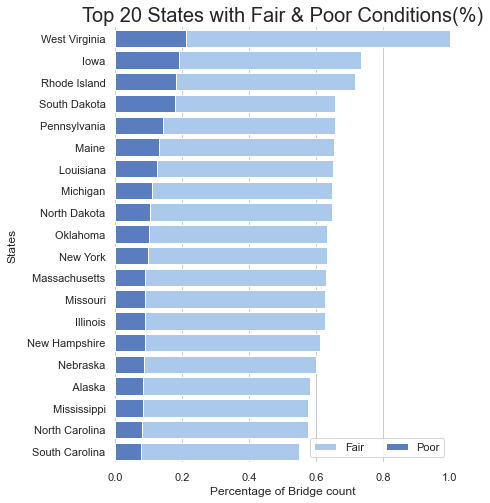

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 8))


# Plot the fair bridge_condition
sns.set_color_codes("pastel")
sns.barplot(x="perc_count", y="state", data=fair_df,
            label="Fair", color="b")

# Plot the poor bridge_condition
sns.set_color_codes("muted")
sns.barplot(x="perc_count", y="state", data=poor_df,
            label="Poor", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 1.0), ylabel="States", xlabel="Percentage of Bridge count")
plt.title('Top 20 States with Fair & Poor Conditions(%)', fontsize=20)
sns.despine(left=True, bottom=True)


In [47]:
df_count = dff.groupby('state')['bridge_condition'].value_counts().sort_values(ascending=False).reset_index(name='condition_count')
df_count.head()

,state,bridge_condition,condition_count
0,Texas,Good,27656
1,Texas,Fair,26069
2,Ohio,Good,16008
3,Illinois,Good,12325
4,California,Good,12240


In [48]:
poor_count = df_count.loc[df_count['bridge_condition']=='Poor'].sort_values(by='condition_count', ascending=False)[:20]
poor_count.head()

,state,bridge_condition,condition_count
51,Iowa,Poor,4533
66,Pennsylvania,Poor,2799
70,Oklahoma,Poor,2319
72,Illinois,Poor,2284
74,Missouri,Poor,2128


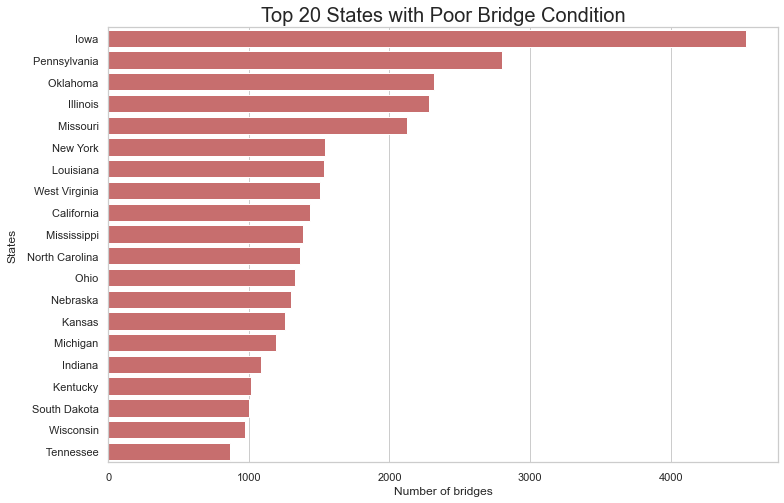

In [49]:
plt.figure(figsize=(12,8))
sns.barplot(y=poor_count['state'], x=poor_count['condition_count'], color='r')
plt.xlabel('Number of bridges')
plt.ylabel('States')
plt.title('Top 20 States with Poor Bridge Condition', fontsize=20);

In [50]:
fair_count = df_count.loc[df_count['bridge_condition']=='Fair'].sort_values(by='condition_count', ascending=False)[:20]
fair_count.head()

,state,bridge_condition,condition_count
1,Texas,Fair,26069
6,Missouri,Fair,12082
7,Illinois,Fair,10936
8,Oklahoma,Fair,10851
9,California,Fair,10764


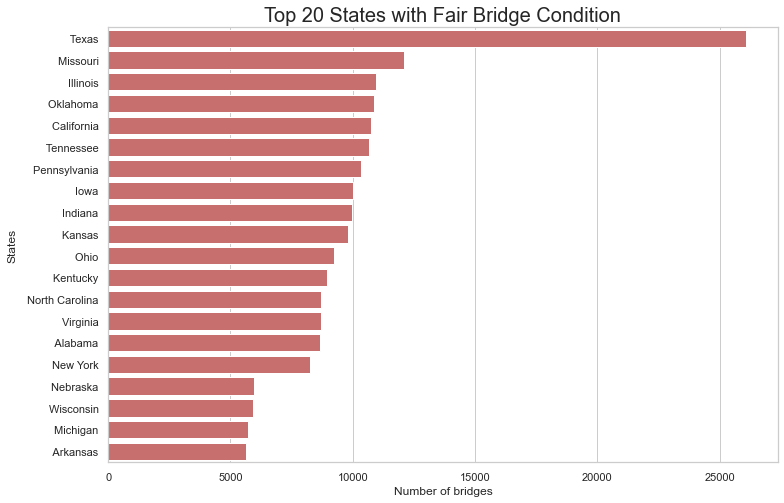

In [51]:
plt.figure(figsize=(12,8))
sns.barplot(y=fair_count['state'], x=fair_count['condition_count'], color='r')
plt.xlabel('Number of bridges')
plt.ylabel('States')
plt.title('Top 20 States with Fair Bridge Condition', fontsize=20);

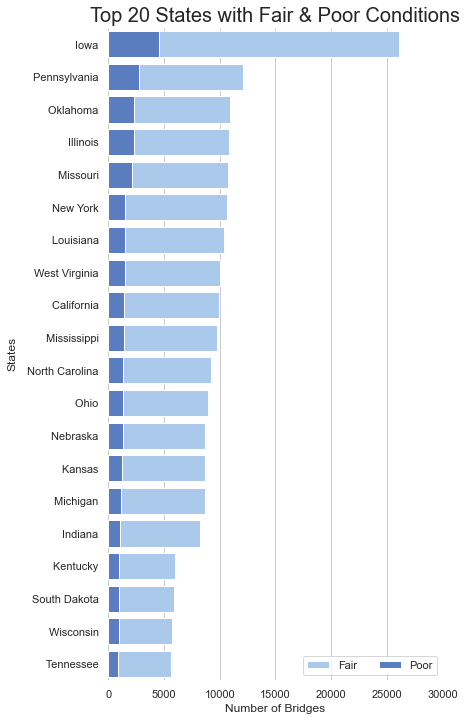

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 12))


# Plot the fair bridge_condition
sns.set_color_codes("pastel")
sns.barplot(x="condition_count", y="state", data=fair_count,
            label="Fair", color="b")

# Plot the poor bridge_condition
sns.set_color_codes("muted")
sns.barplot(x="condition_count", y="state", data=poor_count,
            label="Poor", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 30000), ylabel="States", xlabel="Number of Bridges")
plt.title('Top 20 States with Fair & Poor Conditions', fontsize=20)
sns.despine(left=True, bottom=True)


In [59]:
df.columns

Index(['state', 'str_id', 'deck_type', 'wearing_type', 'membrane_type',
       'deck_protection', 'toll', 'freeze_thaw_cycle', 'snowfall_days',
       'inventory_class_route', 'lanes_on_str', 'lanes_under_str',
       'level_service_code', 'yr_avg_traffic', 'inventory_route_code',
       'truck_network_code', 'min_vertical_underclearance',
       'min_lateral_underclearanceR', 'min_lateral_underclearanceL', 'county',
       'design_material', 'construction_design_value', 'num_spans',
       'structure_length', 'bridge_condition', 'bridge_age', 'latitude',
       'longitude', 'yr_reconst', 'skew', 'max_span', 'bridge_width',
       'deck_width', 'super_st_condition', 'sub_st_condition',
       'deck_condition', 'avg_daily_trfic', 'avg_truck_trfc'],
      dtype='object')

ValueError: cannot reindex from a duplicate axis

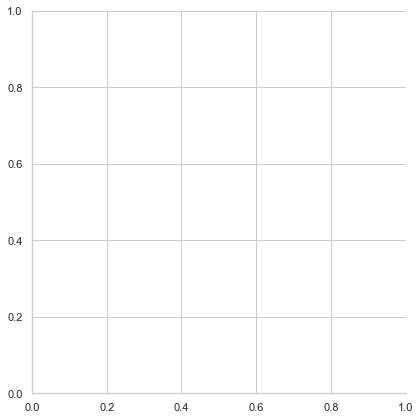

In [63]:
import seaborn as sns
sns.set_theme(style="whitegrid")

# Load the diamonds dataset
# diamonds = sns.load_dataset("diamonds")

# Plot the distribution of clarity ratings, conditional on carat
sns.displot(
    data=df,
    x="snowfall_days", hue="super_st_condition",
    kind="kde", height=6,
    multiple="fill", clip=(0, None),
    palette="ch:rot=-.25,hue=1,light=.75",
)

In [ ]:
import seaborn as sns
sns.set_theme()

# Load the penguins dataset
# penguins = sns.load_dataset("penguins")

# Plot sepal width as a function of sepal_length across days
g = sns.lmplot(
    data=df,
    x="structure_length", y="bridge_width", hue="bridge_condition",
    height=5
)

# Use more informative axis labels than are provided by default
g.set_axis_labels("Snoot length (mm)", "Snoot depth (mm)")

In [ ]:
df.columns

In [ ]:
import seaborn as sns

sns.set_theme(style="darkgrid")
# df = sns.load_dataset("penguins")
sns.displot(
    df, x="avg_truck_trfc", col="bridge_age", row="bridge_condition",
    binwidth=3, height=3, facet_kws=dict(margin_titles=True),
)

## Creating Dummies

In [ ]:
df.columns

In [ ]:
df.info()

In [ ]:
# df['sub_st_condition'] = df.sub_st_condition.astype('str')
# df['super_st_condition'] = df.super_st_condition.astype('str')
# df['deck_condition'] = df.deck_condition.astype('str')
# df['mnt_respons'] = df.mnt_respons.astype('str')
df['toll'] = df.toll.astype('str')

In [ ]:
#separate the features into target, categorical and continuous variables
target = ['bridge_condition']

categorical = ['deck_type', 'wearing_type', 'membrane_type', 'deck_protection',
               'toll', 'design_material','super_st_condition',
               'sub_st_condition']

continuous = ['freeze_thaw_cycle', 'snowfall_days', 'structure_length', 'bridge_age',
              'latitude', 'longitude', 'yr_reconst', 'skew',
              'max_span', 'bridge_width', 'deck_width', 'avg_daily_trfic', 'num_spans']

to_drop = ['state', 'str_id', 'deck_condition', 'mnt_respons']

In [ ]:
df.info()

In [ ]:
# print number of classes in each category
for col in categorical:
    print(col, df[col].value_counts().count())

In [ ]:
df.drop(to_drop+target+continuous, axis=1).columns

In [ ]:
df_dummies = pd.get_dummies(df.drop(to_drop+target, axis=1))
df_dummies.head()

In [ ]:
df_dummies.shape

In [ ]:
df_dummies.info()

In [ ]:
df.num_spans.value_counts().count()

In [ ]:
df_dummies['bridge_condition'] = df['bridge_condition']

In [ ]:
df_dummies.head()

In [ ]:
df_dummies.bridge_condition.value_counts(normalize=True)

In [ ]:
# assign variables for features and target 
X = df_dummies.drop('bridge_condition', axis = 1)
y = df_dummies['bridge_condition']

In [ ]:
# split into test and train data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

# KNN

In [ ]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

models = []
def get_metrics(y_test, X_test, model):
    labels = y_test.to_numpy()
    preds = model.predict(X_test)
    
    metrics = {}
    metrics['accuracy'] = accuracy_score(labels, preds)
    metrics['f1'] = f1_score(labels, preds, average='macro')
    metrics['precision'] = precision_score(labels, preds, average='macro')
    metrics['recall'] = recall_score(labels, preds, average='macro')
    
    return metrics

In [ ]:
X_train

## Baseline model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train);

metrics = get_metrics(y_test, X_test, knn)
metrics['name'] = 'K Nearest Neighbors Baseline'
models.append(metrics)

In [ ]:
print(classification_report(y_train, knn.predict(X_train)))

In [ ]:
print(classification_report(y_test, knn.predict(X_test)))

## Confusion Matrix

In [ ]:
plt.figure(figsize=(6,5))
plot_confusion_matrix(knn, X_test, y_test, values_format='d', cmap=plt.cm.Blues)
plt.title('K Nearest Neighbors')
plt.tight_layout()

plt.show()

## Standardizing 

In [ ]:
# Import StandardScaler
from sklearn.preprocessing import StandardScaler 


# Instantiate StandardScaler
scaler = StandardScaler()

# Transform the training and test sets
scaled_data_train = scaler.fit_transform(X_train)
scaled_data_test = scaler.transform(X_test)

# Convert into a DataFrame
scaled_df_train = pd.DataFrame(scaled_data_train, columns=X.columns)
scaled_df_train.head()

In [ ]:
# Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

# Instantiate KNeighborsClassifier
knn = KNeighborsClassifier()
# Fit the classifier
knn.fit(scaled_data_train, y_train);


# Predict on the test set

metrics = get_metrics(y_test, scaled_data_test, knn)
metrics['name'] = 'K Nearest Neighbors scaled'
models.append(metrics)

## GridSearch CV

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {
    'n_neighbors': [1, 5, 9], # default 5
    'weights': ['uniform', 'distance'], # default 'uniform'
    'leaf_size': [30, 40], # default 30
    'p': [1, 2] # default 2
}

grid_search = GridSearchCV(knn, param_grid, cv=3, scoring='f1_macro')
grid_search.fit(X_train, y_train)

In [ ]:
grid_search.best_params_

In [ ]:
knn_tuned = KNeighborsClassifier(n_neighbors=9, weights='distance', leaf_size=30, p=1)
knn_tuned.fit(scaled_data_train, y_train)
get_metrics(y_test, scaled_data_test, knn_tuned)
metrics['name'] = 'K Nearest Neighbors tuned'
models.append(metrics)

In [ ]:
plt.figure(figsize=(6,5))
plot_confusion_matrix(knn_tuned, scaled_data_test, y_test, values_format='d', cmap=plt.cm.Blues)
plt.title('K Nearest Neighbors')
plt.tight_layout()

plt.show()

## Smote

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
# Previous original class distribution
print('Original class distribution: \n')
print(y.value_counts())
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_sample(X_train, y_train) 
# Preview synthetic sample class distribution
print('-----------------------------------------')
print('Synthetic sample class distribution: \n')
print(pd.Series(y_train_resampled).value_counts()) 

In [ ]:
knn_smote = KNeighborsClassifier(n_neighbors=9, weights='distance', 
                                 leaf_size=30, p=1)
knn_smote.fit(X_train_resampled, y_train_resampled)
get_metrics(y_test, X_test, knn_smote)
metrics['name'] = 'K Nearest Neighbors smote'
models.append(metrics)

In [ ]:
print(classification_report(y_train_resampled, knn_smote.predict(X_train_resampled)))

In [ ]:
print(classification_report(y_test, knn_smote.predict(X_test)))

## Confusion matrix

In [ ]:
plot_confusion_matrix(knn_smote, X_test, y_test,
                      values_format='d', cmap=plt.cm.Blues)
                                      
                     
plt.title('K Nearest Neighbors smote')
plt.tight_layout()

plt.show()

# Random Forest

## Baseline model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(random_state=12)
forest.fit(X_train, y_train);

metrics = get_metrics(y_test, X_test, forest)
metrics['name'] = 'Random Forest Baseline'
models.append(metrics)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,forest.predict(X_test))

In [ ]:
print(classification_report(y_train, forest.predict(X_train)))

In [ ]:
print(classification_report(y_test, forest.predict(X_test)))

## Confusion matrix

In [ ]:
plot_confusion_matrix(forest, X_test, y_test, values_format='d', cmap=plt.cm.Blues)
plt.title('Random forest Baseline')
plt.tight_layout()

plt.show()

## Standardizing

In [ ]:
# Instantiate RandomForestClassifier
forest = RandomForestClassifier()
# Fit the classifier
forest.fit(scaled_data_train, y_train);


# Predict on the test set
metrics = get_metrics(y_test, scaled_data_test, forest)
metrics['name'] = 'Random forest scaled'
models.append(metrics)

## GridSearch CV

In [ ]:
param_grid = {
    'n_estimators': [100, 200], # default 100 #boosting stages
    'max_depth': [30, 35, 40], # default None
    'max_features': [50, 60], # default 'auto': auto=sqrt(# of features)=11, None=# of features=122
#     'min_samples_split' : [20,30,40],
#     'min_samples_leaf'  : [5, 10, 15]
    # default 'auto': auto=sqrt(# of features)=11, None=# of features=122
}
forest = RandomForestClassifier()
grid_search = GridSearchCV(forest, param_grid, cv=3, scoring='f1_macro')
grid_search.fit(scaled_data_train, y_train)

In [ ]:
grid_search.best_params_

In [ ]:
forest_tuned = RandomForestClassifier(n_estimators=200, max_depth=35,
                                      max_features=60, min_samples_leaf=35, 
                                      min_samples_split=70)
forest_tuned.fit(scaled_data_train, y_train)
get_metrics(y_test, scaled_data_test, forest_tuned)
metrics['name'] = 'Random Forest tuned1'
models.append(metrics)

In [ ]:
print(classification_report(y_test, forest_tuned.predict(scaled_data_test)))

In [ ]:
param_grid = {
    'n_estimators': [100, 200], # default 100 #boosting stages
    'max_depth': [30, 35, 40], # default None
    'max_features': [50, 60], # default 'auto': auto=sqrt(# of features)=11, None=# of features=122
#     'min_samples_split' : [20,30,40],
#     'min_samples_leaf'  : [5, 10, 15]
    # default 'auto': auto=sqrt(# of features)=11, None=# of features=122
}
forest = RandomForestClassifier()
grid_search = GridSearchCV(forest, param_grid, cv=3, scoring='f1_macro')
grid_search.fit(scaled_data_train, y_train)

In [ ]:
grid_search.best_params_

In [ ]:
forest_tuned = RandomForestClassifier(n_estimators=200, max_depth=35,
                                      max_features=60, min_samples_leaf=35, 
                                      min_samples_split=70)
forest_tuned.fit(scaled_data_train, y_train)
get_metrics(y_test, scaled_data_test, forest_tuned)
metrics['name'] = 'Rand2om Forest tuned1'
models.append(metrics)

In [ ]:
print(classification_report(y_test, forest_tuned.predict(scaled_data_test))

## Confusion matrix

In [ ]:
plt.figure(figsize=(6,5))
plot_confusion_matrix(knn, X_test, y_test, values_format='d', cmap=plt.cm.Blues)
plt.title('Random Forest tuned1')
plt.tight_layout()

plt.show()

## Smote

In [ ]:
forest_smote = RandomForestClassifier(n_estimators=150, max_depth=40,
                                      max_features=50, min_samples_leaf=35, 
                                      min_samples_split=70)
forest_smote.fit(X_train_resampled, y_train_resampled)
get_metrics(y_test, scaled_data_test, forest_smote)
metrics['name'] = 'Random Forest smote'
models.append(metrics)

In [ ]:
print(classification_report(y_test, forest_smote.predict(scaled_data_test))

## Confusion matrix

In [ ]:
plot_confusion_matrix(forest_tuned, scaled_data_test, y_test, values_format='d', 
                      cmap=plt.cm.Blues)
plt.title('Random Forest Scaled')
plt.tight_layout()

plt.show()

## Feature Importance

In [ ]:
# Plot the feature importance of each feature
features = X_train.shape[1]
plt.figure(figsize=(20,20))
plt.barh(range(features), forest.feature_importances_, align='center')
plt.yticks(np.arange(features), X_train.columns.values)
plt.title('Feature Importance', fontsize=20)
plt.xlabel('Feature importance')
plt.ylabel('Features')

# XGBoost

## Baseline Model

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Instantiate XGBClassifier and fit classifier
xgb = XGBClassifier(random_state=12)
xgb.fit(X_train, y_train);

metrics = get_metrics(y_test, X_test, xgb)
metrics['name'] = 'XG Boost Baseline'
models.append(metrics)

In [ ]:
print(classification_report(y_train, xgb.predict(X_train))

In [ ]:
print(confusion_matrix(y_test, xgb.predict(X_test)))
print(classification_report(y_test, xgb.predict(X_test))

## Confusion matrix

In [ ]:
plot_confusion_matrix(xgb, X_test, y_test, values_format='d', 
                      cmap=plt.cm.Blues)
plt.title('XGBoost')
plt.tight_layout()

plt.show()

### Standardized

In [ ]:
# Fit the classifier
xgb.fit(scaled_data_train, y_train);

# Predict on the test set
metrics = get_metrics(y_test, scaled_data_test, xgb)
metrics['name'] = 'XGBoost_scaled'
models.append(metrics)

### Grid search CV

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {
    'learning_rate': [0.05, 0.1],
    'max_depth': [6, 8, 10],
    'subsample': [0.5, 0.7],
    'n_estimators': [100, 150, 200],
}
xgb = XGBClassifier()
grid_search = GridSearchCV(xgb, param_grid, cv=None, scoring='f1_macro', n_jobs=1)
grid_search.fit(scaled_data_train, y_train)

In [ ]:
grid_search.best_params_

In [ ]:
# Instantiate XGBClassifier and fit classifier

# xgb_tuned = XGBClassifier(n_estimators=200, learning_rate=0.1, max_depth=10,
#                           subsample=0.7)

xgb_tuned = XGBClassifier(objective = objective='multi:softmax', num_class = 3,
                          n_estimators = 200, learning_rate = .1, max_depth = 10, subsample =0.7)


xgb_tuned.fit(scaled_data_train, y_train)
get_metrics(y_test, scaled_data_test, xgb_tuned)
metrics['name'] = 'XGBoost_tuned1'
models.append(metrics)



In [ ]:
print(classification_report(y_train, xgb_tuned.predict(scaled_data_train)))

In [ ]:
print(classification_report(y_test, xgb_tuned.predict(scaled_data_test)))

# Replace target variable classes for visualization

In [ ]:
# Replace target values - there are three classes
df2 = df.replace({'bridge_condition': {'Poor' : 2, 
                                'Fair' : 1, 
                                'Good' : 0}})
# Check to see that it worked
df2.iloc[15:20]

In [ ]:
df2.shape

# Folium Heatmap

In [ ]:
import folium
from folium.plugins import HeatMap

In [ ]:
# Make an empty map
m = folium.Map(location=[40,-100], tiles="OpenStreetMap", zoom_start=4)

# Show the map
m

## By state

In [ ]:
data = df2.groupby('state').median()[['latitude', 'longitude', 'bridge_condition']].values.tolist()
data

In [ ]:
# gradient = {0: 'red', 1: 'brown', 2: 'green'}
HeatMap(data = data).add_to(m)

In [ ]:
display(m)

## By Sub-structure condition

In [ ]:
# Make an empty map
m = folium.Map(location=[40,-100], tiles="OpenStreetMap", zoom_start=4)

#show the map
m

In [ ]:

data1 = df2.groupby('sub_st_condition').median()[['latitude', 'longitude', 'bridge_condition']].values.tolist()

In [ ]:
# gradient = {0: 'red', 1: 'brown', 2: 'green'}

HeatMap(data = data1).add_to(m)
display(m)

## By snowfall days

In [ ]:
# Make an empty map
m = folium.Map(location=[40,-100], tiles="OpenStreetMap", zoom_start=4)

#show the map
m

In [ ]:

data2 = df2.groupby('snowfall_days').median()[['latitude', 'longitude', 'bridge_condition']].values.tolist()
data2

In [ ]:
# gradient = {0: 'red', 1.0: 'brown', 2.0: 'green'}

HeatMap(data = data2).add_to(m)
display(m)

## By age of bridge

In [ ]:
# Make an empty map
m = folium.Map(location=[40,-100], tiles="OpenStreetMap", zoom_start=4)

#show the map
m

In [ ]:

data3 = df2.groupby('bridge_age').median()[['latitude', 'longitude', 'bridge_condition']].values.tolist()

In [ ]:
# gradient = {0: 'red', 1: 'brown', 2: 'green'}

HeatMap(data = data3).add_to(m)
display(m)

## By Freeze and thaw cycle

In [17]:
# Make an empty map
m = folium.Map(location=[40,-100], tiles="OpenStreetMap", zoom_start=4)

#show the map
m

NameError: name 'folium' is not defined

In [ ]:

data4 = df2.groupby('freeze_thaw_cycle').median()[['latitude', 'longitude', 'bridge_condition']].values.tolist()

In [ ]:
# gradient = {0: 'red', 1: 'brown', 2: 'green'}

HeatMap(data = data4).add_to(m)
display(m)

## By Super structure condition

In [ ]:
# Make an empty map
m = folium.Map(location=[40,-100], tiles="OpenStreetMap", zoom_start=4)

#show the map
m

In [ ]:

data5 = df2.groupby('super_st_condition').median()[['latitude', 'longitude', 'bridge_condition']].values.tolist()
data5

In [ ]:
# gradient = {0: 'red', 1: 'brown', 2: 'green'}

HeatMap(data = data5).add_to(m)
display(m)

## By County

In [ ]:
# Make an empty map
m = folium.Map(location=[40,-100], tiles="OpenStreetMap", zoom_start=4)

#show the map
m

In [ ]:

data6 = df2.groupby('county').median()[['latitude', 'longitude', 'bridge_condition']].values.tolist()
data6

In [ ]:

HeatMap(data = data6).add_to(m)
display(m)

## By New York Counties

In [ ]:
df.state.unique()

In [ ]:
ny_df = df.loc[df['state']=='  New York']
ny_df

In [ ]:
ny_df.shape

In [ ]:
ny_df.bridge_condition.value_counts(normalize=True)

New York has 15,505 bridges out of which 

In [ ]:
# Replace target values - there are three classes
ny_df = ny_df.replace({'bridge_condition': {'Poor' : 2, 
                                'Fair' : 1, 
                                'Good' : 0}})


In [ ]:
# ny_df_grouped = ny_df.groupby('county').median()[['latitude', 'longitude', 'bridge_condition']].values.tolist()
ny_df_grouped = ny_df[['latitude', 'longitude', 'bridge_condition']].values.tolist()
ny_df_grouped

In [ ]:
# Make an empty map
m = folium.Map(location=[40,-100], tiles="OpenStreetMap", zoom_start=4)

#show the map
m

In [ ]:

HeatMap(data = ny_df_grouped).add_to(m)
display(m)